In [1]:
import sys
import os
import subprocess
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# %matplotlib inline

# Add the path to housing_app to the Python path, if it's not in the folder
# TODO: Adjust the path to match the local location of housing_app
# sys.path.append('/Users/k4robins/Devel/0_Thesis/housing_app')
# from housing_app.model.model import City

# Alternatively, if the housing_app is in the current folder, directly import it
from model.model import City

## Single Run

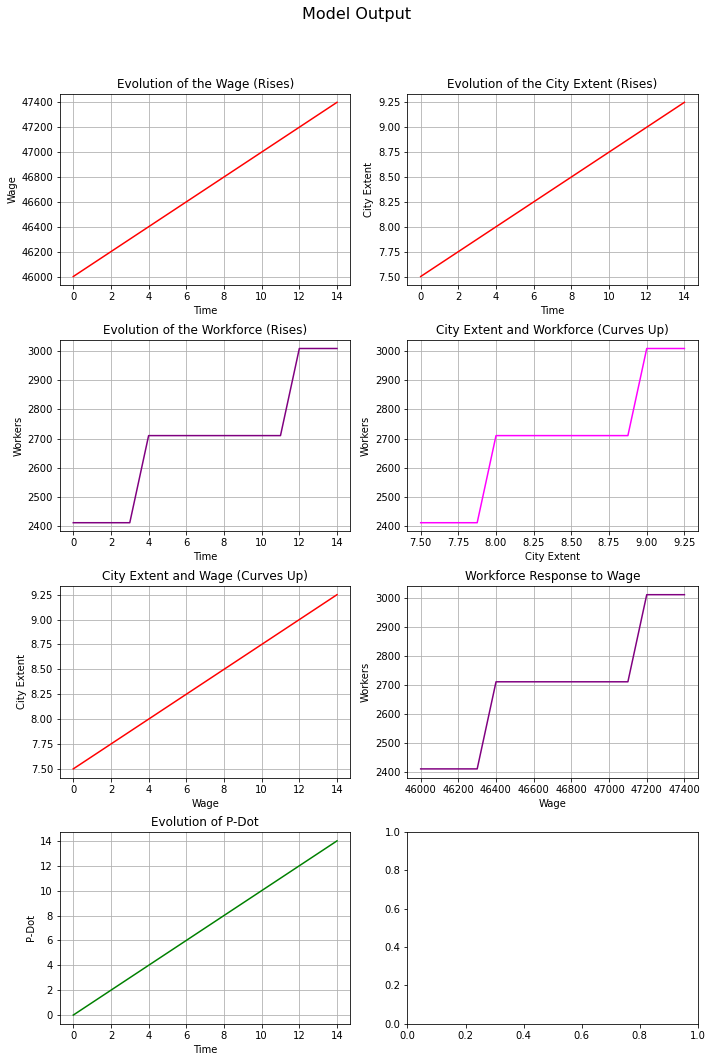

In [7]:
# Set parameter values
num_steps  = 15
parameters = {
            'run_notes': 'Debugging model.',
            'width': 50,
            'height': 1,
            'init_city_extent': 10.,  # f CUT OR CHANGE?
            'seed_population': 10,
            'density': 300,
            'subsistence_wage': 40000.,  # psi
            'init_wage_premium_ratio': 0.2,
            'workforce_rural_firm': 100,
            'price_of_output': 1.,  # TODO CUT?
            'alpha_F': 0.18,
            'beta_F': 0.72,  # beta and was lambda, workers_share of aglom surplus
            'beta_city': 1.12,
            'gamma': 0.02,  # FIX value
            'Z': 0.5,  # CUT? Scales new entrants
            'firm_adjustment_parameter': 0.25,
            'wage_adjustment_parameter': 0.5,
            'mortgage_period': 5.0,  # T, in years
            'working_periods': 40,  # in years
            'savings_rate': 0.3,
            'r_prime': 0.05,  # 0.03
            'discount_rate': 0.07, # 1/delta
            'r_margin': 0.01,
            'property_tax_rate': 0.04,  # tau, annual rate, was c
            'housing_services_share': 0.3,  # a
            'maintenance_share': 0.2,  # b
            'max_mortgage_share': 0.9,
            'ability_to_carry_mortgage': 0.28,
            'wealth_sensitivity': 0.1,
        }

def run_simulation(num_steps, parameters):
    city = City(num_steps, **parameters)
    city.run_model()

    agent_out = city.datacollector.get_agent_vars_dataframe()
    model_out = city.datacollector.get_model_vars_dataframe()
    return agent_out, model_out

# Call the functions to generate and display the plots
agent_out, model_out = run_simulation(num_steps, parameters)



In [ ]:
def plot_model_data(model_out):
    workers = np.array(model_out['workers'])
    wage    = np.array(model_out['wage'])
    city_extent_calc = np.array(model_out['city_extent_calc'])
    p_dot   = np.array(model_out['p_dot'])
    time    = np.arange(len(workers))

    # Set up the figure with subplots
    fig, axes = plt.subplots(4, 2, figsize=(10, 15))
    fig.suptitle('Model Output', fontsize=16)

    # Subplot 0L: Evolution of the Wage  
    axes[0, 0].plot(time, wage, color='red')
    axes[0, 0].set_title('Evolution of the Wage (Rises)')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Wage')
    axes[0, 0].grid(True)

    # Subplot 0R: Evolution of the City Extent
    axes[0,1].plot(time, city_extent_calc, color='red')
    axes[0,1].set_title('Evolution of the City Extent (Rises)')
    axes[0,1].set_xlabel('Time')
    axes[0,1].set_ylabel('City Extent')
    axes[0,1].grid(True)

    # Subplot 1L: Evolution of the Workforce
    axes[1, 0].plot(time, workers, color='purple') 
    axes[1, 0].set_title('Evolution of the Workforce (Rises)')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Workers')
    axes[1, 0].grid(True)

    # Subplot 1R: City Extent and Workforce  
    axes[1, 1].plot(city_extent_calc, workers, color='magenta')
    axes[1, 1].set_title('City Extent and Workforce (Curves Up)')
    axes[1, 1].set_xlabel('City Extent')
    axes[1, 1].set_ylabel('Workers')
    axes[1, 1].grid(True)              
    
    # Subplot 2L: City Extent and Wage
    axes[2, 0].plot(time, city_extent_calc, color='red')
    axes[2, 0].set_title('City Extent and Wage (Curves Up)')
    axes[2, 0].set_xlabel('Wage')
    axes[2, 0].set_ylabel('City Extent')
    axes[2, 0].grid(True)

    # Subplot 2R: Workforce Response to Wage
    axes[2, 1].plot(wage, workers, color='purple')
    axes[2, 1].set_title('Workforce Response to Wage')
    axes[2, 1].set_xlabel('Wage')
    axes[2, 1].set_ylabel('Workers')
    axes[2, 1].grid(True)

    # Subplot 3L: Evolution of P_Dot
    axes[3, 0].plot(time, time, color='green')
    axes[3, 0].set_title('Evolution of P-Dot')
    axes[3, 0].set_xlabel('Time')
    axes[3, 0].set_ylabel('P-Dot')
    axes[3, 0].grid(True)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
plot_model_data(model_out)

### Batch Run

In [3]:
from mesa.batchrunner import batch_run

variable_parameters = {
    'density': [1, 100],
    'subsistence_wage': [10000, 30000]
}

agent_reporters = {
    'x': lambda a: a.pos[0],
    'y': lambda a: a.pos[1],
}

# Run the batch simulations
results = batch_run(City, variable_parameters, data_collection_period=1, iterations=2, max_steps=4)



8it [00:06,  1.30it/s]


In [4]:
# # Convert the results to a pandas DataFrame
# df = pd.DataFrame(results)

# # Save the DataFrame to a CSV file
# df.to_csv('batch_results.csv', index=False)